In [110]:
import numpy as np
import pandas as pd
import glob
import matplotlib.pyplot as plt
import seaborn as sns


# Data-oriented programming paradigms
## Exercise 3
### Group 4

Piotr Antosiuk 11929198

Husein Gagajew 11775804

Johannes Fesl 11708466


## Loading Data
### Mercer Data:

In [23]:
def load_mercer_data():
    files = glob.glob('data/mercer_*.csv')
    datalist = []
    for file in files:
        year = int(file[12:16])
        df = pd.read_csv(file, sep=';', header=0, encoding='ISO-8859-1').assign(year=year)
        datalist.append(df)
        
    data = pd.concat(datalist)
    data.sort_values(['year'], ascending=True, inplace=True)
    data.set_index(['year', 'City'], inplace=True)
    data.index.set_names(['year', 'City'], inplace=True)
    return data

mercer_data = load_mercer_data()
mercer_data

Country  Rank
year City                                  
2010 Vienna                   Austria     1
     Canberra               Australia    26
     Calgary                   Canada    28
     Singapore              Singapore    28
     Stuttgart                Germany    30
     Honolulu           United States    31
     Adelaide               Australia    32
     San Francisco      United States    32
     Paris                     France    34
     Helsinki                 Finland    35
     Boston             United States    37
     Lyon                      France    38
     London            United Kingdom    39
     Tokyo                      Japan    40
     Kobe                       Japan    41
     Milan                      Italy    41
     Barcelona                  Spain    44
     Lisbon                  Portugal    45
     Washington, D.C.   United States    45
     Chicago            United States    45
     New York City      United States    49
     Seattle            United States    50
     Dublin                   Ireland    26
     Nuremberg                Germany    24
     Brisbane               Australia    36
     Hamburg                  Germany    23
     Oslo                      Norway    24
     Geneva               Switzerland     3
     Vancouver                 Canada     3
     Auckland             New Zealand     4
...                               ...   ...
2019 Vienna                   Austria     1
     Zagreb                   Croatia    98
     Montreal                  Canada    21
     Stockholm                 Sweden    23
     Nuremberg                Germany    23
     Singapore              Singapore    25
     Madrid                     Spain    46
     Seattle            United States    46
     Edinburgh         United Kingdom    45
     New York City      United States    44
     Barcelona                  Spain    43
     Milan                      Italy    41
     London            United Kingdom    41
     Lyon                      France    40
     Paris                     France    39
     Lisbon                  Portugal    37
     Chicago            United States    49
     Honolulu           United States    37
     Brisbane               Australia    35
     San Francisco      United States    34
     Dublin                   Ireland    33
     Calgary                   Canada    32
     Helsinki                 Finland    31
     Canberra               Australia    30
     Adelaide               Australia    29
     Brussels                 Belgium    28
     Stuttgart                Germany    27
     Oslo                      Norway    25
     Boston             United States    36
     Wroclaw                   Poland   100

[347 rows x 2 columns]

## Numbeo data

In [65]:
def load_numbeo_city_data():
    files = glob.glob('data/numbeo/quality-of-life-city/*.csv')
    datalist = []
    for file in files:
        year = file[33:37]
        df = pd.read_csv(file, sep=';', header=0).assign(year=year)
        city_parts = df['City'].str.split(',', n = 1, expand = True)
        df['City'] = city_parts
        df['Country'] = city_parts[len(city_parts.columns) - 1]
        datalist.append(df)
        
    data = pd.concat(datalist)
    
    data.set_index(['year', 'Country', 'City'], inplace = True)
    data.index.set_names(['year', 'Country', 'City'], inplace = True)
    return data

numbeo_city_data = load_numbeo_city_data()
numbeo_city_data

Rank  Quality of Life Index  \
year Country              City                                            
2012 Germany              Berlin               1                 215.25   
     Switzerland          Zurich               2                 213.18   
     Canada               Edmonton             3                 204.86   
     Australia            Perth                4                 196.00   
     Canada               Calgary              5                 190.78   
     Norway               Trondheim            6                 187.70   
     Sweden               Stockholm            7                 166.05   
     Australia            Sydney               8                 165.67   
     Canada               Montreal             9                 164.99   
     United Arab Emirates Dubai               10                 161.35   
     Canada               Toronto             11                 159.07   
     Denmark              Copenhagen          12                 155.40   
     Australia            Brisbane            13                 147.46   
     CA,United States     San Francisco       14                 147.17   
     Japan                Tokyo               15                 136.19   
     Canada               Vancouver           16                 133.65   
     CA,United States     Los Angeles         17                 121.27   
     Ireland              Dublin              18                 117.57   
     NY,United States     New York            19                 115.47   
     Slovenia             Ljubljana           20                 111.73   
     Spain                Madrid              21                 108.58   
     Australia            Melbourne           22                 107.12   
     Portugal             Porto               23                 104.21   
                          Lisbon              24                 102.92   
     Czech Republic       Brno                25                  90.44   
     Singapore            Singapore           26                  87.08   
     India                Bangalore           27                  86.34   
     Czech Republic       Prague              28                  85.70   
     Belgium              Brussels            29                  83.68   
     Brazil               Curitiba            30                  77.95   
...                                          ...                    ...   
2019 Azerbaijan           Baku               197                  99.58   
     Pakistan             Lahore             198                  98.49   
     Russia               Yekaterinburg      199                  96.75   
     Vietnam              Hanoi              200                  96.73   
     Ukraine              Dnipro             201                  94.31   
     Thailand             Bangkok            202                  93.80   
     Colombia             Bogota             203                  93.48   
     India                Kolkata            204                  93.42   
     Mexico               Mexico City        205                  92.82   
     Russia               Novosibirsk        206                  90.00   
     Sri Lanka            Colombo            207                  89.18   
     Kazakhstan           Almaty             208                  87.69   
     India                Delhi              209                  83.16   
     Pakistan             Karachi            210                  82.06   
     Peru                 Lima               211                  81.87   
     Brazil               Sao Paulo          212                  78.76   
     Nepal                Kathmandu          213                  78.69   
     Egypt                Cairo              214                  76.45   
     Iran                 Tehran             215                  75.30   
     India                Mumbai             216                  74.73   
     China                Shanghai           217                  73.

In [4]:
def load_numbeo_country_data():
    files = glob.glob('data/numbeo/quality-of-life-country/*.csv')
    datalist = []
    for file in files:
        year = file[36:40]
        df = pd.read_csv(file, sep=';', header=0).assign(year=year)
        datalist.append(df)
        
    data = pd.concat(datalist)
    
    data.set_index(['year', 'Country'], inplace = True)
    data.index.set_names(['year','Country'], inplace = True)
    return data

numbeo_country_data = load_numbeo_country_data()
numbeo_country_data

Rank  Quality of Life Index  \
year Country                                               
2012 Switzerland                1                 194.11   
     Germany                    2                 184.42   
     Norway                     3                 183.43   
     United Arab Emirates       4                 177.07   
     New Zealand                5                 174.28   
     Sweden                     6                 171.72   
     Canada                     7                 164.99   
     Denmark                    8                 163.12   
     Australia                  9                 162.03   
     Austria                   10                 159.89   
     Netherlands               11                 158.07   
     United States             12                 140.62   
     Japan                     13                 130.52   
     Ireland                   14                 125.14   
     Slovenia                  15                 121.94   
     France                    16                 119.51   
     Israel                    17                 118.25   
     United Kingdom            18                 110.09   
     Portugal                  19                 105.10   
     Spain                     20                 100.93   
     Belgium                   21                 100.68   
     Croatia                   22                  93.06   
     Czech Republic            23                  88.14   
     Singapore                 24                  87.08   
     South Africa              25                  83.59   
     Saudi Arabia              26                  71.02   
     Turkey                    27                  66.70   
     Malaysia                  28                  65.31   
     Poland                    29                  60.63   
     Mexico                    30                  60.31   
...                           ...                    ...   
2019 Taiwan                    42                 133.82   
     Bulgaria                  43                 130.59   
     Turkey                    44                 125.51   
     Bosnia And Herzegovina    45                 124.51   
     Chile                     46                 124.14   
     Mexico                    47                 123.48   
     Argentina                 48                 122.49   
     Malaysia                  49                 122.11   
     Georgia                   50                 120.90   
     Serbia                    51                 119.83   
     India                     52                 117.51   
     Panama                    53                 113.12   
     Jordan                    54                 112.94   
     Lebanon                   55                 111.21   
     Macedonia                 56                 110.64   
     Colombia                  57                 108.36   
     Indonesia                 58                 107.20   
     Russia                    59                 104.94   
     Pakistan                  60                 104.63   
     Thailand                  61                 103.26   
     Ukraine                   62                 102.34   
     Hong Kong                 63                 100.90   
     Brazil                    64                 100.33   
     China                     65                  97.92   
     Sri Lanka                 66                  95.30   
     Philippines               67                  90.73   
     Vietnam                   68                  88.82   
     Kazakhstan                69                  87.17   
     Iran                      70                  87.02   
     Egypt                     71                  83.98   

                             Purchasing Power Index  Safety Index  \
year Country                                                        
2012 Switzerland                             127.42         74.22   
     Germany                             

## Country statistics

In [157]:
country_names_dict = {'Viet Nam': 'Vietnam',
                      'Venezuela (Boliv. Rep. of)': 'Venezuela',
                      'United States of America': 'United States',
                      'Russian Federation': 'Russia',
                      'Czechia': 'Czech Republic',
                      'Iran (Islamic Republic of)': 'Iran',
                      'Republic of Korea': 'South Korea',
                      'Bosnia and Herzegovina': 'Bosnia And Herzegovina',
                      'China, Hong Kong SAR': 'Hong Kong',
                      'China Hong Kong SAR': 'Hong Kong',
                      'Hong Kong SAR': 'Hong Kong',
                      'North Macedonia': 'Macedonia',
                      'TFYR of Macedonia': 'Macedonia',
                      'Slovak Republic': 'Slovakia',
                      'Korea. Republic of': 'South Korea',
                      'Taiwan Province of China': 'Taiwan',
                      'China. People\'s Republic of': 'China'
                     }
def load_and_pivot_data(path, year, index='Country', pivot_column='Series', values='Value', sep=','):
    filepath = path 
    df = pd.read_csv(filepath, sep=sep)
    df.drop(df.loc[df['Year'] != year].index, inplace=True)
    df.replace({'Country': country_names_dict}, inplace=True)
    df = df.pivot(index=index, columns=pivot_column, values=values)
    return df

In [86]:
# mercer_2019 = mercer_data.loc[2019]
# mercer_2019.reset_index(inplace=True)
# mercer_2019.set_index(['Country', 'City'], inplace=True)

numbeo_2019 = pd.DataFrame(numbeo_city_data.loc['2019', 'Rank'])
numbeo_2019.reset_index(inplace=True)
numbeo_2019['Country'] = numbeo_2019['Country'].apply(lambda country_name: country_name.split(',')[1] if len(country_name.split(',')) > 1 else country_name)
numbeo_2019.set_index(['Country', 'City'], inplace=True)

ranks = numbeo_2019
# ranks = mercer_2019.merge(numbeo_2019, left_index=True, right_index=True, how='outer', suffixes=('_mercer', '_numbeo'))

C:\Users\Piotr\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: PerformanceWarning: indexing past lexsort depth may impact performance.
  """


### Population

Rank                                                    1.000000
Population aged 0 to 14 years old (percentage)          0.466140
Population aged 60+ years old (percentage)             -0.490777
Population density                                      0.093728
Population mid-year estimates (millions)                0.140824
Population mid-year estimates for females (millions)    0.136095
Population mid-year estimates for males (millions)      0.145189
Sex ratio (males per 100 females)                      -0.081085
Name: Rank, dtype: float64


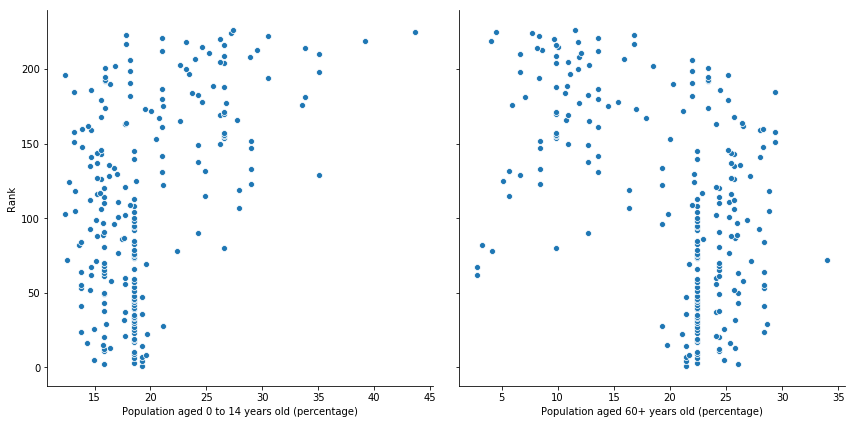

In [118]:
filepath = 'data/imf/population_area_density.csv'
population_data_2019 = load_and_pivot_data(filepath, year=2019, sep=';')

ranks_population = ranks.merge(population_data_2019, left_on='Country', right_index=True, how='left')
ranks_population.dropna(inplace=True)

corr = ranks_population.corr()

print(corr['Rank'])
sns.pairplot(ranks_population, 
             x_vars=['Population aged 0 to 14 years old (percentage)', 'Population aged 60+ years old (percentage)'],
             y_vars=['Rank'],
             height=6)

Merge of the first UN database revealed that there were some values missing. The reason for that was different naming of country's in UN database and Numbeo database. This led to fixing the import function by introducing the dictionary which harmonizes keys in UN database to match those from Numbeo database. Unfortunately, there is no separate for Taiwan in UN database because of political reasons. It doesn't make sense to match Taiwan with data from China. Since there's only one city from Taiwan in the databse (Taipei), the record is deleted. 

In the table of correlations with Rank we can see that the correlations between country's population statistics and city liveability are rather weak. The ones which stand out most are percentage of population aged 0-14 and percentage of population aged 60+. The first gives a positive and the second a negative correlation. This means that liveable cities are located in countries with rather older than younger societies. This correlation is caused by the fact that developed countries usually have older societies than developing countries.

### Urban population

Urban population(percent)                                             929
Urban population(percent growth rate per annum)                       696
Rural population(percent growth rate per annum)                       696
Capital city population(thousands)                                    672
Capital city population(as a percentage of total urban population)    441
Capital city population(as a percentage of total population)          441
Name: Series, dtype: int64
                Rank  Capital city population(thousands)   \
Country City                                                
Taiwan  Taipei   139                                  NaN   
        Taipei   139                                  NaN   

                Urban population(percent)  
Country City                               
Taiwan  Taipei                        NaN  
        Taipei                        NaN  


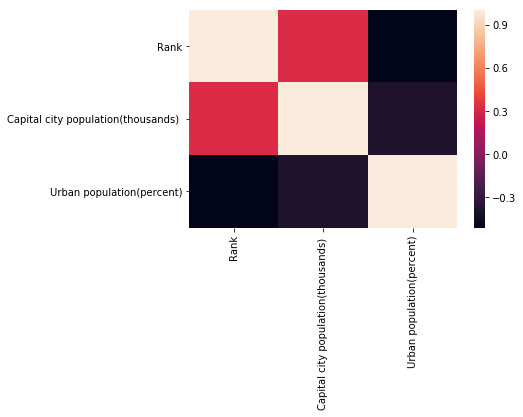

In [150]:
filepath = 'data/imf/urban_population.csv'
urban_population_2018 = load_and_pivot_data(filepath, year=2018, sep=';')
urban_population_2018.head()

urban_population_ranks = ranks.merge(urban_population_2018, left_on='Country', right_index=True, how='left')
print(urban_population_ranks[pd.isnull(urban_population_ranks).values])
urban_population_ranks.dropna(inplace=True)

corr = urban_population_ranks.corr()

sns.heatmap(corr)

### GDP

                   Rank  GDP PPP (billions)  GDP PPP per capita  \
Country   City                                                    
Venezuela Caracas   226                 NaN            8065.696   

                   GDP per capita USD  GDP billions USD  
Country   City                                           
Venezuela Caracas            2739.821             70.14  
Rank                  1.000000
GDP PPP (billions)   -0.310603
GDP PPP per capita   -0.438723
GDP per capita USD   -0.552308
GDP billions USD     -0.410272
Name: Rank, dtype: float64


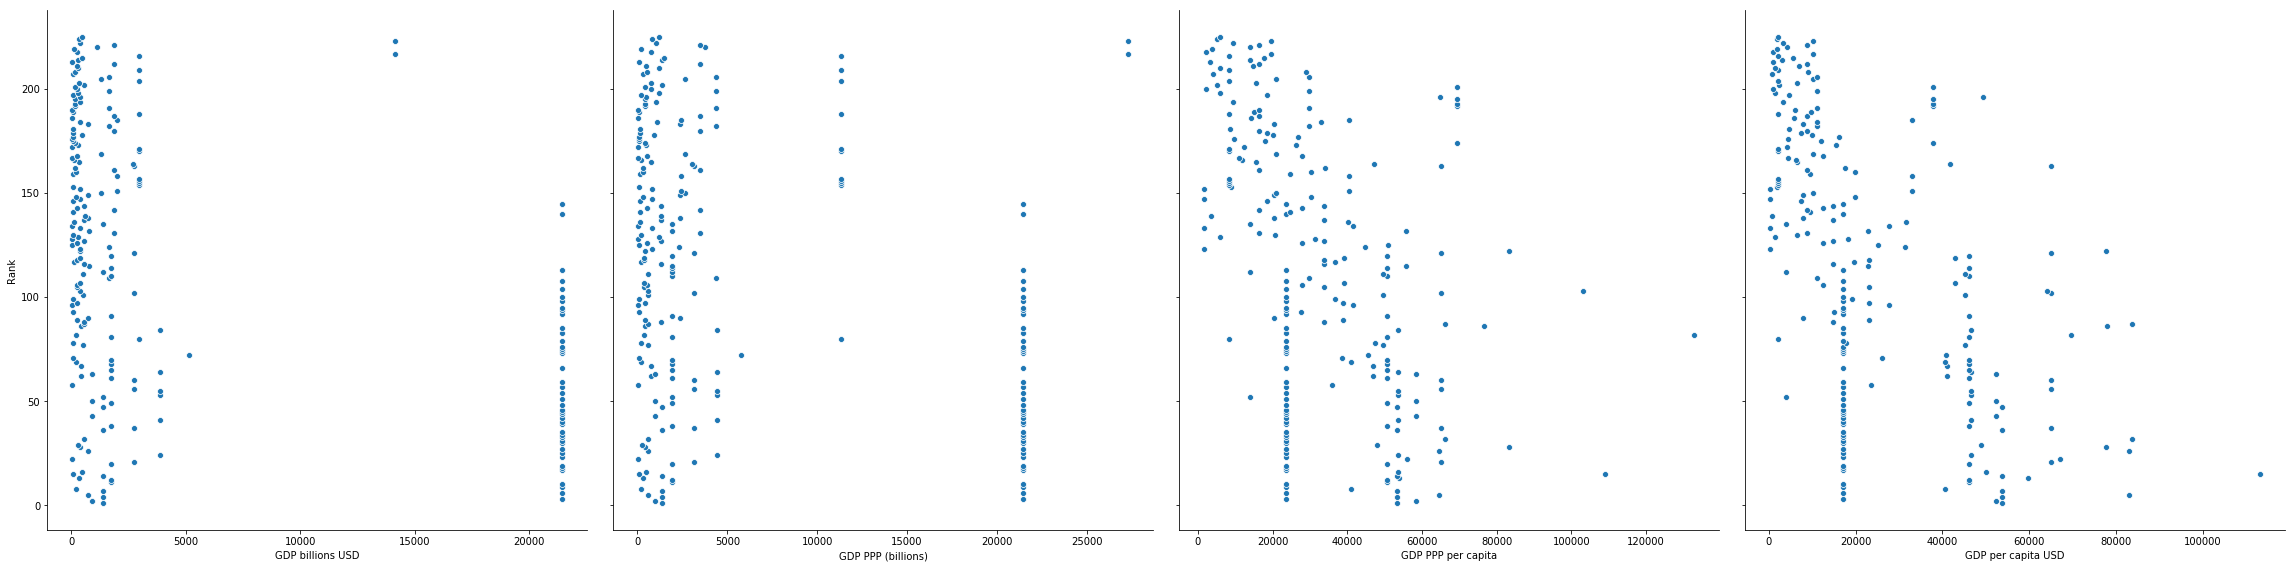

In [179]:
filepath = 'data/imf/gdp_2019.csv'
gdp_2019 = pd.read_csv(filepath, sep=';', na_values='no data')
gdp_2019.replace({'Country': country_names_dict}, inplace=True)
gdp_2019.set_index('Country', inplace=True)

gdp_ranks = ranks.merge(gdp_2019, left_on='Country', right_index=True, how='left')
gdp_ranks.loc['Switzerland', 'GDP PPP per capita'] = 64649 # imputed with value from Wikipedia
gdp_ranks.loc['Switzerland', 'GDP per capita USD'] = 82950 # imputed with value from Wikipedia
print(gdp_ranks[pd.isnull(gdp_ranks).values])
gdp_ranks.dropna(inplace=True)
corr = gdp_ranks.corr()

print(corr['Rank'])

sns.pairplot(gdp_ranks, 
             x_vars=['GDP billions USD', 'GDP PPP (billions)', 'GDP PPP per capita', 'GDP per capita USD'],
             y_vars='Rank',
             height=8
            )

Data about GDP was acquired from Internation Monetary Fund. After data exploration it turned out that GDP per capita is missing for Switzerland - both nominal and PPP. The values were imputed with 2018 estimates as country is stable. That should not introduce big bias to the data. Another missing data is GDP PPP for Venezuela which is currently facing tough economic situation. For this reason Caracas will be removed from the dataset. 

### Employment

In [34]:
filepath = 'data/imf/employment.csv'
employment_2019 = load_and_pivot_data(filepath, year=2019, sep=';')
employment_2019.head()

Series,Employment by industry: Agriculture (%) Female,Employment by industry: Agriculture (%) Male,Employment by industry: Agriculture (%) Male and Female,Employment by industry: Industry (%) Female,Employment by industry: Industry (%) Male,Employment by industry: Industry (%) Male and Female,Employment by industry: Services (%) Female,Employment by industry: Services (%) Male,Employment by industry: Services (%) Male and Female
Country,,,,,,,,,
Afghanistan,73.48,59.34,61.72,5.46,7.10,6.82,21.07,33.56,31.46
Albania,44.61,32.80,37.77,13.73,22.48,18.80,41.67,44.72,43.44
Algeria,8.77,13.39,12.61,55.75,44.81,46.66,35.46,41.81,40.73
Angola,57.00,43.12,50.03,1.30,16.08,8.72,41.70,40.80,41.25
Argentina,0.14,0.76,0.51,7.50,33.44,23.08,92.36,65.79,76.41
